# Project: Medical Appointment No Shows Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### "A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?"
### This dataset collects information from 100k medical appointments in Brazil and is focused on the question
### of whether or not patients show up for their appointment.
### The analysis is focused on finding factors predicting whether or not the patient will show up to thier appointment.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Medical_Appointment_No_Shows.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
21353,9.593520e+13,5642284,M,2016-04-29T15:30:24Z,2016-05-03T00:00:00Z,58,MARIA ORTIZ,0,0,0,0,0,1,No
99296,3.533153e+12,5743668,F,2016-05-30T09:15:47Z,2016-06-06T00:00:00Z,62,BENTO FERREIRA,0,1,0,0,0,1,No
98729,5.351186e+13,5758001,F,2016-06-01T10:07:10Z,2016-06-01T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,0,No
88848,2.493773e+13,5782957,F,2016-06-07T12:52:35Z,2016-06-07T00:00:00Z,34,MÁRIO CYPRESTE,0,0,0,0,0,0,No
72125,6.938581e+11,5694355,F,2016-05-13T08:33:51Z,2016-05-17T00:00:00Z,65,MARIA ORTIZ,0,0,0,0,0,0,No
13659,8.362914e+12,5713282,F,2016-05-18T09:56:29Z,2016-05-18T00:00:00Z,13,FORTE SÃO JOÃO,0,0,0,0,0,0,No
4644,8.556158e+14,5704999,F,2016-05-16T17:20:37Z,2016-05-25T00:00:00Z,59,SÃO CRISTÓVÃO,0,1,0,0,0,1,No
65600,9.722835e+11,5604254,F,2016-04-20T07:48:45Z,2016-05-02T00:00:00Z,1,CONSOLAÇÃO,0,0,0,0,0,1,No
92529,4.177641e+12,5753441,M,2016-05-31T14:05:28Z,2016-06-03T00:00:00Z,71,JARDIM CAMBURI,0,0,0,0,0,1,No
18620,8.599912e+13,5738974,F,2016-05-25T12:06:41Z,2016-05-25T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
    ### Quality:
        - Erroneous datatype for PatientID.
        - Erroneous datatype for Gender
        - Erroneous datatype for ScheduledDay.
        - Erroneous datatype for AppointmentDay
   
        

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [7]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [8]:
df['PatientId'] = df['PatientId'].astype(np.int64)

In [9]:
df['Gender'] = df['Gender'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes


### Changing the encoding of the No-show column

In [11]:
df['No-show'].replace('No','1', inplace = True)

In [12]:
df['No-show'].replace('Yes','0', inplace = True)

In [13]:
df.rename(columns={'No-show':'Show'}, inplace = True)

In [14]:
df.sample(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
11094,5729293421352,5689855,F,2016-05-12 09:07:21+00:00,2016-05-30 00:00:00+00:00,25,RESISTÊNCIA,1,0,0,0,0,1,0
10127,1151925176216,5705030,F,2016-05-16 17:31:14+00:00,2016-05-19 00:00:00+00:00,81,CRUZAMENTO,0,1,0,0,0,0,1
37397,927641864538845,5662021,F,2016-05-05 08:00:55+00:00,2016-05-05 00:00:00+00:00,0,ROMÃO,0,0,0,0,0,0,1
39809,53131563221741,5737861,F,2016-05-25 10:08:50+00:00,2016-05-25 00:00:00+00:00,9,JABOUR,0,0,0,0,0,0,0
83237,937916612972,5591330,F,2016-04-15 16:38:52+00:00,2016-05-03 00:00:00+00:00,19,ITARARÉ,0,0,0,0,0,1,1
12956,84632516348559,5690799,F,2016-05-12 10:41:36+00:00,2016-05-18 00:00:00+00:00,34,ILHA DE SANTA MARIA,0,0,0,0,0,0,1
86708,61895293545899,5748590,M,2016-05-31 07:09:52+00:00,2016-06-06 00:00:00+00:00,54,DA PENHA,0,0,0,0,0,1,1
93243,66112933474331,5771106,F,2016-06-03 11:33:10+00:00,2016-06-03 00:00:00+00:00,3,SÃO JOSÉ,0,0,0,0,0,0,1
80393,976857628423,5732296,M,2016-05-24 11:17:08+00:00,2016-05-30 00:00:00+00:00,44,SANTO ANDRÉ,0,1,0,0,0,1,1
17412,143861688869361,5722009,M,2016-05-20 06:59:04+00:00,2016-05-30 00:00:00+00:00,8,SANTO ANDRÉ,0,0,0,0,0,0,0


In [70]:
df['Show']= df['Show'].astype('int64')

In [80]:
df['Show']= df['Show'].astype('bool')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Show          

In [18]:
df_clean = df.copy()

In [19]:
df_clean.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
49698,266124245513685,5572014,M,2016-04-12 09:55:43+00:00,2016-05-12 00:00:00+00:00,43,SANTA CLARA,0,0,0,1,0,0,False
57097,981892517522369,5615638,F,2016-04-25 12:47:55+00:00,2016-05-05 00:00:00+00:00,9,CENTRO,0,0,0,0,0,1,True
71784,48738739562464,5720355,F,2016-05-19 13:43:43+00:00,2016-05-19 00:00:00+00:00,59,PRAIA DO CANTO,0,0,0,0,0,0,True
63791,6484836689559,5736846,M,2016-05-25 08:50:19+00:00,2016-05-30 00:00:00+00:00,10,PRAIA DO SUÁ,0,0,0,0,0,1,False
88601,2743744783969,5715911,F,2016-05-18 15:25:31+00:00,2016-06-08 00:00:00+00:00,10,INHANGUETÁ,0,0,0,0,0,1,True
24552,497856665933926,5729551,F,2016-05-24 07:37:08+00:00,2016-05-31 00:00:00+00:00,73,TABUAZEIRO,0,1,0,0,0,1,True
51702,38535488144391,5715318,M,2016-05-18 14:06:09+00:00,2016-05-19 00:00:00+00:00,0,FONTE GRANDE,0,0,0,0,0,0,True
56534,6288745818135,5619955,F,2016-04-26 08:30:17+00:00,2016-05-06 00:00:00+00:00,39,ITARARÉ,0,0,0,0,0,0,False
64007,23754984958597,5739814,M,2016-05-25 14:10:29+00:00,2016-05-30 00:00:00+00:00,50,ANDORINHAS,0,0,1,0,0,0,True
107493,56435859996522,5785143,M,2016-06-08 07:03:59+00:00,2016-06-08 00:00:00+00:00,60,GOIABEIRAS,0,0,0,0,0,0,True


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [20]:
Showed = df_clean['Show'] == 1
Not_Showed = df_clean['Show'] == 0


### Analysing the effect of  being enrolled in Brasilian welfare program.

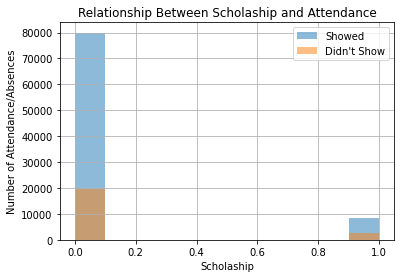

In [120]:
df.Scholarship[Showed].hist(alpha=0.5, label='Showed')
df.Scholarship[Not_Showed].hist(alpha=0.5, label="Didn't Show")
plt.title('Relationship Between Scholaship and Attendance')
plt.xlabel('Scholaship')
plt.ylabel('Number of Attendance/Absences')
plt.legend();

In [22]:
df_clean.groupby(['Scholarship'])['Show'].value_counts()

Scholarship  Show 
0            True     79925
             False    19741
1            True      8283
             False     2578
Name: Show, dtype: int64

In [23]:
df_clean.query("Scholarship == 0").groupby('Scholarship')['Show'].value_counts()/len(df[df['Scholarship'] == 0])

Scholarship  Show 
0            True     0.801928
             False    0.198072
Name: Show, dtype: float64

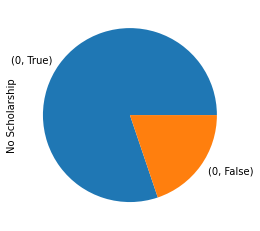

In [24]:
df_clean.query("Scholarship == 0").groupby('Scholarship')['Show'].value_counts().plot(kind='pie', label='No Scholarship');

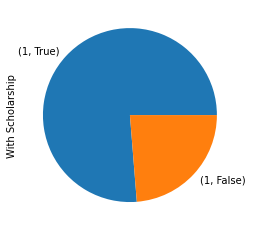

In [26]:
df_clean.query("Scholarship == 1").groupby('Scholarship')['Show'].value_counts().plot(kind='pie', label='With Scholarship');

#### We can see that the No-show up cases between the patients who were enrolled in the Barzillian welfare is found to be around 23.7% which is higher than those who weren't enrolled in the program which was found to be around 19.8%.

### The effect of Age of Showing up to Appointments

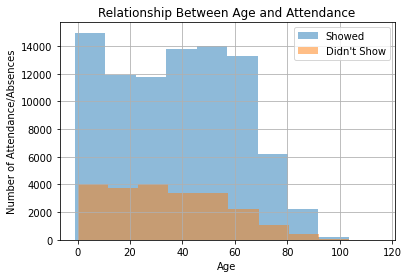

In [119]:
df_clean.Age[Showed].hist(alpha=0.5, label='Showed')
df_clean.Age[Not_Showed].hist(alpha=0.5, label="Didn't Show")
plt.title('Relationship Between Age and Attendance')
plt.xlabel('Age')
plt.ylabel('Number of Attendance/Absences')
plt.legend();

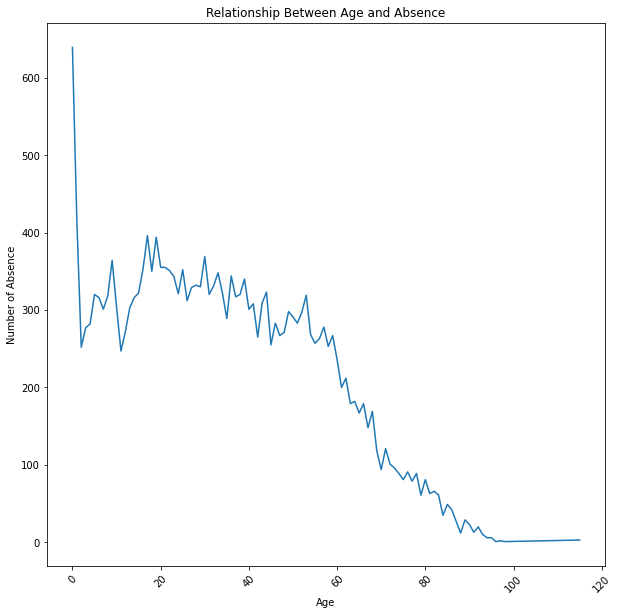

In [118]:
df_plot= df_clean.query("Show == False").groupby('Age')['Show'].count()

df_plot.plot(figsize=[10,10])
plt.xticks(rotation=45)
plt.title('Relationship Between Age and Absence')
plt.xlabel('Age')
plt.ylabel('Number of Absence')
plt.show()

#### We can clearly see the relationship between Age and Abscene of appointments as the number of abscenes go down drastically between older patients compared to young patients.


### Relationship Between Gender and Showing up to Appointments.

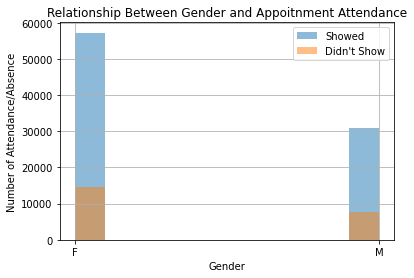

In [117]:
df_clean.Gender[Showed].hist(alpha=0.5, label='Showed')
df_clean.Gender[Not_Showed].hist(alpha=0.5, label="Didn't Show")
plt.title('Relationship Between Gender and Appoitnment Attendance')
plt.xlabel('Gender')
plt.ylabel('Number of Attendance/Absence');
plt.legend();

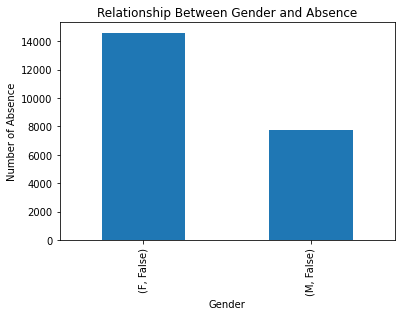

In [116]:
df_clean.query("Show == False").groupby('Gender')['Show'].value_counts().plot(kind='bar');
plt.title('Relationship Between Gender and Absence')
plt.xlabel('Gender')
plt.ylabel('Number of Absence');

#### It appears to be the absences cases between females are way more than males but also the numbers of females making appointments are almost twice the males so further analysis should be carried out.

In [31]:
df_clean.groupby('Gender').Show.value_counts()

Gender  Show 
F       True     57246
        False    14594
M       True     30962
        False     7725
Name: Show, dtype: int64

In [32]:
df_clean['Gender'].groupby(df_clean['Show']).value_counts()

Show   Gender
False  F         14594
       M          7725
True   F         57246
       M         30962
Name: Gender, dtype: int64

#### Even though it's clearly that Females make almost double the appointment as the males but in reality the No-show up cases between the females was found to be 20.3% where the males was found to be 19.9% which is almost the same as the females.

### The effect of Receiving SMS on Showing up to the appointment

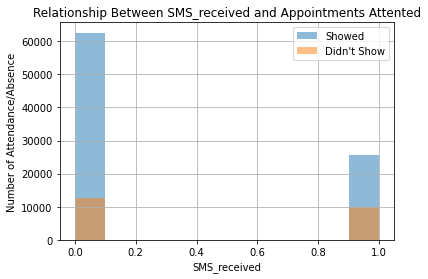

In [110]:
df_clean.SMS_received[Showed].hist(alpha=0.5, label='Showed')
df_clean.SMS_received[Not_Showed].hist(alpha=0.5, label="Didn't Show")
plt.title('Relationship Between SMS_received and Appointments Attented')
plt.xlabel('SMS_received')
plt.ylabel('Number of Attendance/Absence')
plt.legend();

Text(0, 0.5, 'Number of Absence')

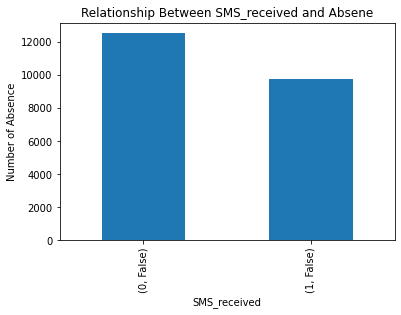

In [109]:
df_clean.query("Show == False").groupby('SMS_received')['Show'].value_counts().plot(kind='bar');
plt.title('Relationship Between SMS_received and Absene')
plt.xlabel('SMS_received')
plt.ylabel('Number of Absence')

#### The number of absences between patients who recieved SMS are more than the patients who didn't receive any SMS prior to the date of appointment.

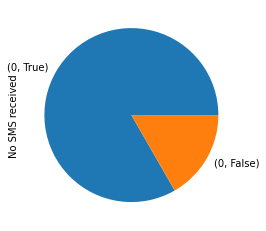

In [35]:
df_clean.query("SMS_received == 0").groupby('SMS_received')['Show'].value_counts().plot(kind='pie', label='No SMS received');

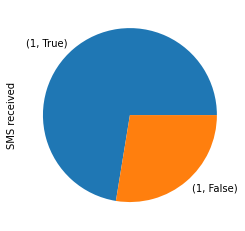

In [36]:
df_clean.query("SMS_received == 1").groupby('SMS_received')['Show'].value_counts().plot(kind='pie', label='SMS received');

#### We can see that the No-show up cases between the patients who received SMS reminder is higher -27.5%- than those who didn't receive SMS reminder -16.7%-

### Relationship between Hipertension and Showing up to appointments.

In [37]:
df_clean['Hipertension'].groupby(df_clean['Show']).value_counts()

Show   Hipertension
False  0               18547
       1                3772
True   0               70179
       1               18029
Name: Hipertension, dtype: int64

Text(0, 0.5, 'Number of Abscence')

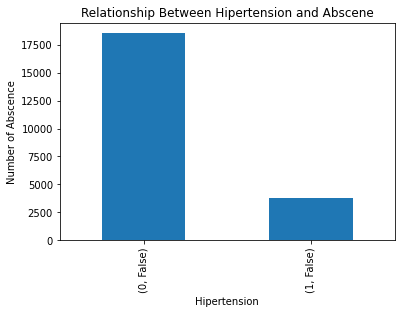

In [107]:
df_clean.query("Show == False").groupby('Hipertension')['Show'].value_counts().plot(kind='bar');
plt.title('Relationship Between Hipertension and Absence')
plt.xlabel('Hipertension')
plt.ylabel('Number of Absence')

#### The number of absences between Non-Hipertension patients is way more the patients with Hipertension.

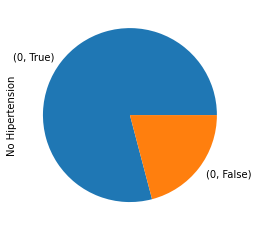

In [39]:
df_clean.query("Hipertension == 0").groupby('Hipertension')['Show'].value_counts().plot(kind='pie', label='No Hipertension');

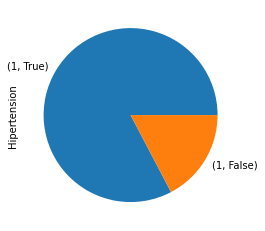

In [40]:
df_clean.query("Hipertension == 1").groupby('Hipertension')['Show'].value_counts().plot(kind='pie', label='Hipertension');

#### No-Show up cases between hipertension patients was found to be around 17.3% which is slightly lower than the cases between No- Hipertension patients which was found to be around 20.1% cases.

### Relationship between Diabetes and Showing up to Appointments.

In [41]:
df_clean['Diabetes'].groupby(df_clean['Show']).value_counts()

Show   Diabetes
False  0           20889
       1            1430
True   0           81695
       1            6513
Name: Diabetes, dtype: int64

Text(0, 0.5, 'Number of Absence')

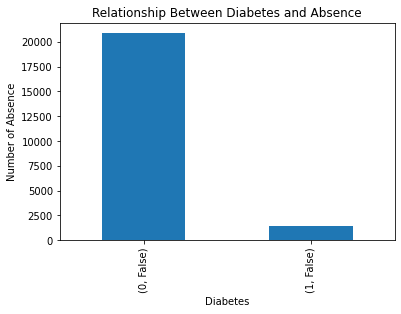

In [111]:
df_clean.query("Show == False").groupby('Diabetes')['Show'].value_counts().plot(kind='bar');
plt.title('Relationship Between Diabetes and Absence')
plt.xlabel('Diabetes')
plt.ylabel('Number of Absence')

#### As expected the number of absences between Diabetes patients is extremely low due to the fact that diabetes can lead to other health complications and diabetes patients should be aware and always getting check-ups and such.

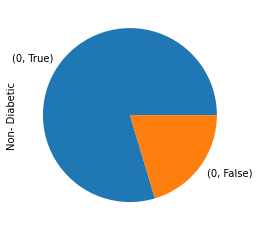

In [43]:
df_clean.query("Diabetes == 0").groupby('Diabetes')['Show'].value_counts().plot(kind='pie', label='Non- Diabetic');

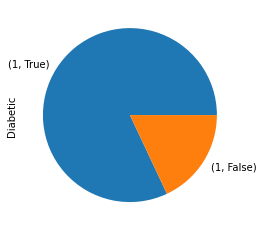

In [44]:
df_clean.query("Diabetes == 1").groupby('Diabetes')['Show'].value_counts().plot(kind='pie', label='Diabetic');

#### No-Show up cases between diabetis patients was found to be around 18% which is slightly lower than the cases between No- Diabtis patients which was found to be around 20.3% cases.

### Relationship between Alcoholism and Showing up to Appointments.

In [45]:
df_clean.groupby(['Alcoholism'])['Show'].value_counts()

Alcoholism  Show 
0           True     85525
            False    21642
1           True      2683
            False      677
Name: Show, dtype: int64

In [47]:
df_clean['Alcoholism'].groupby(df_clean['Show']).value_counts()

Show   Alcoholism
False  0             21642
       1               677
True   0             85525
       1              2683
Name: Alcoholism, dtype: int64

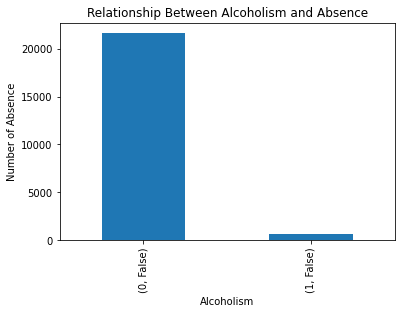

In [112]:
df_clean.query("Show == False").groupby('Alcoholism')['Show'].value_counts().plot(kind='bar');
plt.title('Relationship Between Alcoholism and Absence')
plt.xlabel('Alcoholism')
plt.ylabel('Number of Absence');

#### The number of absences between Alcoholic patients is almost non existent compared to non-alcoholism patients and one of the reason is that acoholism can lead to multpile health complications.

In [50]:
df_clean.query("Alcoholism == 0").groupby('Alcoholism')['Show'].value_counts()

Alcoholism  Show 
0           True     85525
            False    21642
Name: Show, dtype: int64

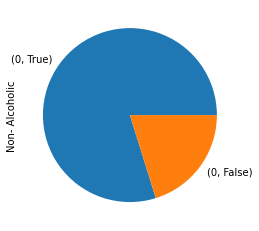

In [51]:
df_clean.query("Alcoholism == 0").groupby('Alcoholism')['Show'].value_counts().plot(kind='pie', label='Non- Alcoholic');

In [52]:
df_clean.query("Alcoholism == 1").groupby('Alcoholism')['Show'].value_counts()

Alcoholism  Show 
1           True     2683
            False     677
Name: Show, dtype: int64

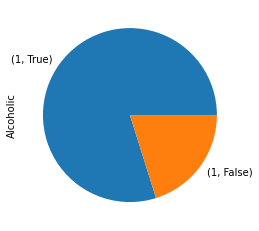

In [53]:
df_clean.query("Alcoholism == 1").groupby('Alcoholism')['Show'].value_counts().plot(kind='pie', label='Alcoholic');

#### No-Show up cases between alcoholic patients was found to be around 20.1% which is almost the same the cases between Non- Alcoholic patients which was found to be around 20.2% cases.

### Relationship between Handcap and Showing up to Appointments.

In [54]:
df_clean.groupby(['Handcap'])['Show'].value_counts()

Handcap  Show 
0        True     86374
         False    21912
1        True      1676
         False      366
2        True       146
         False       37
3        True        10
         False        3
4        True         2
         False        1
Name: Show, dtype: int64

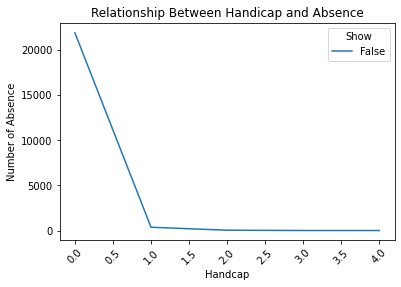

In [113]:
df_handcap=df_clean.query("Show == False").groupby('Handcap')['Show'].value_counts()
df_handcap.unstack().plot()
plt.xticks(rotation=45)
plt.title('Relationship Between Handicap and Absence')
plt.xlabel('Handcap')
plt.ylabel('Number of Absence');

#### We can see the number of absences cases goes drastiaclly down from no handcap to Lv1, 2 and onward levels of handcapped patients.

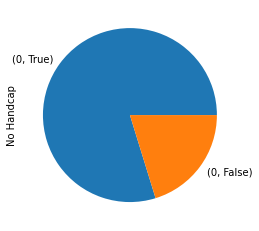

In [57]:
df_clean.query("Handcap == 0").groupby('Handcap')['Show'].value_counts().plot(kind='pie',label='No Handcap');

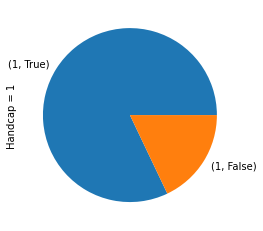

In [58]:
df_clean.query("Handcap == 1").groupby('Handcap')['Show'].value_counts().plot(kind='pie',label='Handcap = 1');

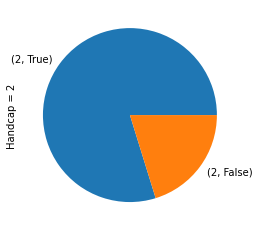

In [59]:
df_clean.query("Handcap == 2").groupby('Handcap')['Show'].value_counts().plot(kind='pie',label='Handcap = 2');

#### No-Show up cases between the Non-handicapped patients was found to be around 20.2% where the Lv1 Handicap was found to be around 18% and Lv2 Handicapped cases of absence where around 20%.
#### Note: Lv 2 ,3 and 4 the sample is way to small to make the correct analysis and which means it cannot affect the No-Show cases.

<a id='conclusions'></a>
## Conclusions
#### What factors are important to predict if a patient will show up to thier appointment?
        - First factor analyzed was whether or not the patient was enrolled in the welfare program. 
            We found higher percentage of absence of patient enrolled in the program than others and the reason for that
            according to a study " people who aren't enrolled in any healthcare are careful with making appointment 
            resulting of lesser abscence.
            
        - Second factor analyzed was the Gender to see if it had any impact on the abscene percentage. 
            we found out that females makes almost twice the appointments than males but regarding the appointment abscence
                the percentage is almost the same.
        
        - Third Factor analyzed was receiving an SMS prior to the appointment.
            the analysis proved that pecentage of abscence in people receiving SMS is higher than other people who didn't
            receive SMS which means recieving SMS doesn't impact if a person will show or not since in most cases 
            the patient already decieded not to show up rather than forgetting about the appointment.
           
        -Fourth Factor was the Age
            as expected the percentage of abscence between the age of 20 to 40 is higher as people of that age have lesser
            regard to their health compared to the percentage of people older than 45 years old and even more than people 
            older than 60 years old as it's shown in previous studies that people starts to care more about their health 
            the older they grew.
            It is noteable that patients older than 17 years old have low abscence level that is probably 
            due to the partents making the appointments and accompanying the child.
            
### Limitations:
    - It was important to analyze the relationship between the area of hospital and appointment attendance but the area data
        was lacking demographic information which can skew and mislead the analysis if it was done without that data.
    - There wasn't clear information on whether the patient chose the appointment date or hospital did and also the exact
        hour of the appointment was missing so analyzing humanbehavior based on lacked or vague information 
        seemed misleading.